<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/Fasion_mnist_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras - Fasion MNIST
1. Fasion_mnist_작성자이름.ipynb
2. Image Data
3. Categorical Classification
4. Metric -> 'Accuracy', 'Overfitting','Callbacks'


In [1]:
import warnings
warnings.filterwarnings('ignore')

## 0.Import Tensorflow & Keras
* import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

* import Tensorflow

In [3]:
import tensorflow as tf

tf.__version__

'2.4.1'

* GPU 확인

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

## 1.Fasion MNIST Data_Set Load & Review



### 1)Load Fasion MNIST Data_Set

In [5]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

* Train_Data Information

In [6]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


* Test_Data Information

In [7]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


### 2)Visualization

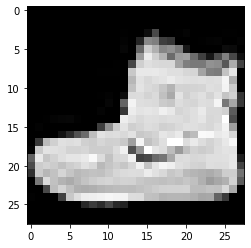

In [8]:
import matplotlib.pyplot as plt

# 어떤 이미지인지 확인하기(흑백)
digit = X_train[0]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [9]:
import numpy as np

# 2차원 행렬로 확인하기
np.set_printoptions(linewidth = 150)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

## 2.Data Preprocessing


### 1)Reshape and Normalization
* reshape

In [10]:
#3차원으로 구성된 데이터를 한줄로 쭉 펼쳐 2차원 형태로 만든다(가로로 길게 잘라 옆에붙인다)
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normaliztion

In [11]:
# model에 집어넣기 위해 데이터를 실수화 한 후 정규화시킨다
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

print(X_train[2])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.08627451 0.4627451  0.09411765 0.
 0.         0.         0.         0.         0.18823529 0.34509804 0.01960784 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.04705882 0.39215686 0.83137255
 0.80392157 0.7254902  0.70196078 0.67843137 0.72941176 0.75686275 0.86666667 0.55686275 0.33333333 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.33333333 0.29803922 0.78039216 0.88235294 0.97254902 1.         0.93333333 0.88627451 0.61568627 0.26666667 0.31372549 0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.35686275 0.2705

### 2)One Hot Encoding

In [12]:
from keras.utils import to_categorical

#결과값을 인코딩한 후 실수형으로 만든다(1.값이 존재하는 인덱스가 실제 y값에 해당)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 3.MNIST Keras Modeling


### 1)Model Define

In [13]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))  #다중분류에는 softmax / 이중분류는 sigmoid

In [14]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 2)Model Compile

In [15]:
mnist.compile(loss = 'categorical_crossentropy', #다중분류모델
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Model Fit

In [16]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 4ms/step - loss: 0.7794 - accuracy: 0.7239 - val_loss: 0.3989 - val_accuracy: 0.8545
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8500 - val_loss: 0.3937 - val_accuracy: 0.8574
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8746 - val_loss: 0.3309 - val_accuracy: 0.8831
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.8833 - val_loss: 0.3732 - val_accuracy: 0.8739
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2915 - accuracy: 0.8926 - val_loss: 0.3299 - val_accuracy: 0.8840
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.8966 - val_loss: 0.3356 - val_accuracy: 0.8830
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.9014 - val_loss: 0.3425 - val_accuracy: 0.8848

### 4)Result Visualization

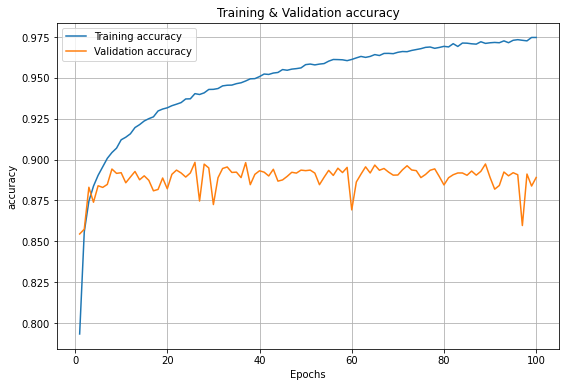

In [17]:
epochs = range(1, len(Hist_mnist.history['accuracy']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['accuracy'])
plt.plot(epochs, Hist_mnist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

#Test Data의 정확도가 90퍼센트를 넘지 못해 모델성능이 좋지는 않다
#과적합 문제가 발생했다고 볼 수 있다

### 5)Model Evaluate
* Loss & Accuracy

In [18]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.9119 - accuracy: 0.8837
Loss = 1.91188
Accuracy = 0.88370


### 6)Model Predict

In [19]:
#첫번째 데이터 Probability
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [20]:
#첫번째 데이터 Class
print(mnist.predict_classes(X_test[:1, :]))

[9]


## 4.MNIST Keras Modeling - Overfitting Issue


### 1)Model Define

In [62]:
#from keras import regularizers

#최적의 성능 찾기 : 여러조합 시도하기 
mnist_new = models.Sequential()
mnist_new.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_new.add(layers.Dropout(0.5))
mnist_new.add(layers.BatchNormalization())
mnist_new.add(layers.Activation('relu'))
mnist_new.add(layers.Dense(256))
mnist_new.add(layers.Dropout(0.2))
mnist_new.add(layers.BatchNormalization())
mnist_new.add(layers.Activation('relu'))
mnist_new.add(layers.Dense(64, activation = 'relu'))
mnist_new.add(layers.Dropout(0.2))
mnist_new.add(layers.BatchNormalization())
mnist_new.add(layers.Activation('relu'))
mnist_new.add(layers.Dense(10, activation = 'softmax'))

In [63]:
mnist_new.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)              

### 2)Model Compile

In [64]:
mnist_new.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop', #adam보다 나은듯
              metrics = ['accuracy'])

### 3)Model Fit

In [65]:
%%time

Hist_mnist_new = mnist_new.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.8801 - accuracy: 0.7046 - val_loss: 0.5011 - val_accuracy: 0.8157
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4667 - accuracy: 0.8359 - val_loss: 0.3859 - val_accuracy: 0.8596
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8490 - val_loss: 0.3708 - val_accuracy: 0.8648
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4026 - accuracy: 0.8573 - val_loss: 0.3633 - val_accuracy: 0.8621
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3819 - accuracy: 0.8633 - val_loss: 0.3584 - val_accuracy: 0.8687
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3615 - accuracy: 0.8665 - val_loss: 0.3688 - val_accuracy: 0.8717
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3582 - accuracy: 0.8718 - val_loss: 0.3440 - val_accuracy: 0.8785

### 4)Result Visualization

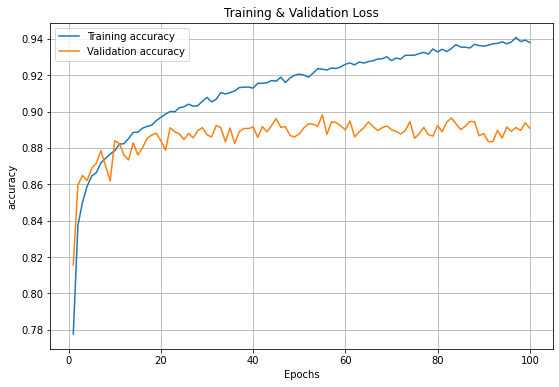

In [66]:
epochs = range(1, len(Hist_mnist_new.history['loss']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_new.history['accuracy'])
plt.plot(epochs, Hist_mnist_new.history['val_accuracy'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()
##88 = > 89로 이전보다 향상됨

### 5)Model Evaluate
* Loss & Accuracy

In [67]:
loss, accuracy = mnist_new.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8905
Loss = 0.33478
Accuracy = 0.89050


### 6)Model Predict

In [68]:
#첫번째 데이터 Probability
np.set_printoptions(suppress=True, precision=9)

print(mnist_new.predict(X_test[:1,:]))

[[0.000016554 0.000000016 0.000001582 0.000000103 0.00000039  0.013910547 0.000007116 0.02038856  0.000136902 0.96553826 ]]


In [69]:
#첫번째 데이터 Class
print(mnist_new.predict_classes(X_test[:1, :]))

[9]


## 4. Ealry Stopping 

### 1)Keras Session Clear

In [70]:
from keras import backend as K

K.clear_session()

### 2)Model Define & Compile

In [80]:
#define - 위에서 찾은 최적모델
mnist_fin = models.Sequential(name = 'EarlyStopping')
mnist_fin.add(layers.Dense(256, input_shape = (28 * 28,)))
mnist_fin.add(layers.Dropout(0.5))
mnist_fin.add(layers.BatchNormalization())
mnist_fin.add(layers.Activation('relu'))
mnist_fin.add(layers.Dense(64))
mnist_fin.add(layers.Dropout(0.2))
mnist_fin.add(layers.BatchNormalization())
mnist_fin.add(layers.Activation('relu'))
mnist_fin.add(layers.Dense(10, activation = 'softmax'))

#compile
mnist_fin.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Ealry Stopping

In [84]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1)

### 4)ModelCheckpoint()

In [85]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_mnist.h5',
                     monitor = 'accuracy',
                     mode = 'max',
                     save_best_only = True,
                     verbose = 1)

### 5)Model Fit with callbacks

In [86]:
%%time

Hist_mnist_fin = mnist_fin.fit(X_train, y_train,
                         epochs = 300,
                         batch_size = 128,
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/300
469/469 [==============================] - 2s 4ms/step - loss: 0.3315 - accuracy: 0.8787

Epoch 00001: accuracy improved from -inf to 0.87865, saving model to best_mnist.h5
Epoch 2/300
469/469 [==============================] - 2s 4ms/step - loss: 0.3271 - accuracy: 0.8831

Epoch 00002: accuracy improved from 0.87865 to 0.88312, saving model to best_mnist.h5
Epoch 3/300
469/469 [==============================] - 2s 4ms/step - loss: 0.3203 - accuracy: 0.8833

Epoch 00003: accuracy improved from 0.88312 to 0.88330, saving model to best_mnist.h5
Epoch 4/300
469/469 [==============================] - 2s 4ms/step - loss: 0.3182 - accuracy: 0.8854

Epoch 00004: accuracy improved from 0.88330 to 0.88540, saving model to best_mnist.h5
Epoch 5/300
469/469 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.8866

Epoch 00005: accuracy improved from 0.88540 to 0.88657, saving model to best_mnist.h5
Epoch 6/300
469/469 [==============================] - 2s 4ms/s

### 6)Best Model & Model Evaluate

In [87]:
!ls -l

total 1764
-rw-r--r-- 1 root root 1801352 Mar 19 08:50 best_mnist.h5
drwxr-xr-x 1 root root    4096 Mar  5 14:37 sample_data


In [88]:
loss, accuracy = mnist_new.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8905
Loss = 0.33478
Accuracy = 0.89050


In [89]:
#첫번째 데이터 Probability
np.set_printoptions(suppress=True, precision=9)

print(mnist_new.predict(X_test[:1,:]))

[[0.000016554 0.000000016 0.000001582 0.000000103 0.00000039  0.013910547 0.000007116 0.02038856  0.000136902 0.96553826 ]]


In [90]:
#첫번째 데이터 Class
print(mnist_new.predict_classes(X_test[:1, :]))

[9]


본 내용은 2021/03/19(금)에 작성되었습니다.